## Principal_component _analysis (PCA)

## Que: Perform Principal component analysis and perform clustering for wine data.


## Importing Libraries

In [22]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
 

## Importing the Data

In [23]:
wine_data=pd.read_csv('/content/wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Data Understanding

In [24]:
wine_data['Type'].unique()

array([1, 2, 3])

In [25]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [26]:
wine_data[wine_data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [27]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [28]:
wine_data_1=wine_data.iloc[:,1:14]
wine_data_1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
wine_data_1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

## Data Preparation

In [30]:
scale_model = StandardScaler()
wine_data_1_scale=scale_model.fit_transform(wine_data_1)
wine_data_1_scale

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
wine_data_1_tranform=pca.fit_transform(wine_data_1_scale)
wine_data_1_tranform=pd.DataFrame(wine_data_1_tranform,columns=['col_1','col_2'])
wine_data_1_tranform

,col_1,col_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [32]:
X=wine_data_1_tranform
y=wine_data.loc[:,'Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 2), (36, 2), (142,), (36,))

## K-Means Clustering

## Find optimum number of  cluster

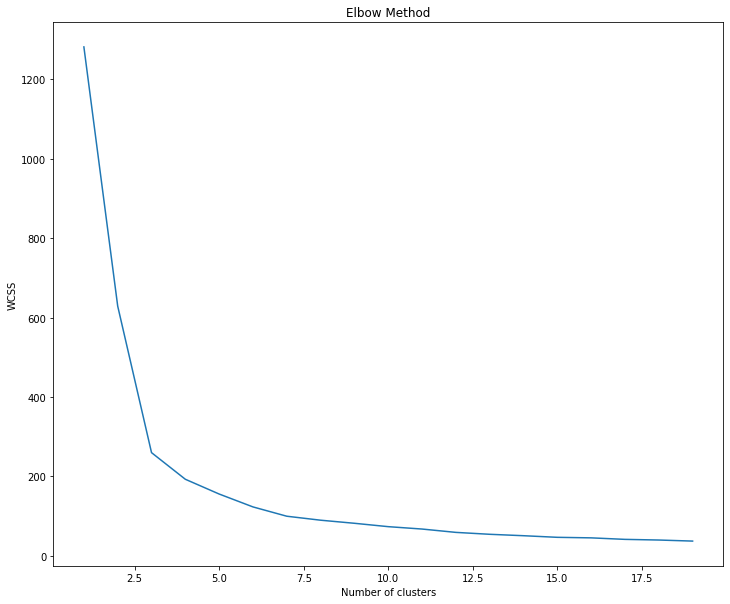

In [34]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters =i,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Model Builing and Model Training

In [35]:
kmeans_model=KMeans(3,random_state=12)
kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=12)

In [36]:
y_predict=kmeans_model.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [37]:
clusters = pd.DataFrame(y_predict, columns=['clusters'])
clusters

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
173,2
174,2
175,2
176,2


In [38]:
wine_data['clusters']=clusters

In [39]:
wine_data[wine_data['Type']==1].shape

(59, 15)

In [40]:
wine_data[wine_data['Type']==2].shape

(71, 15)

In [41]:
wine_data[wine_data['Type']==3].shape

(48, 15)

In [42]:
wine_data[wine_data['clusters']==0].shape

(65, 15)

In [43]:
wine_data[wine_data['clusters']==1].shape

(64, 15)

In [44]:
wine_data[wine_data['clusters']==2].shape

(49, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


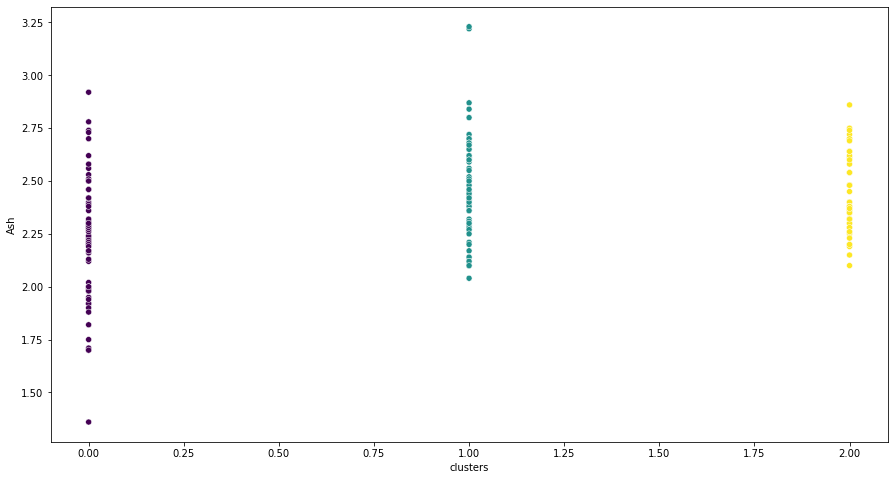

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(wine_data['clusters'],wine_data['Ash'],c=kmeans_model.labels_) 
plt.show()

### Plot for the Actual data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


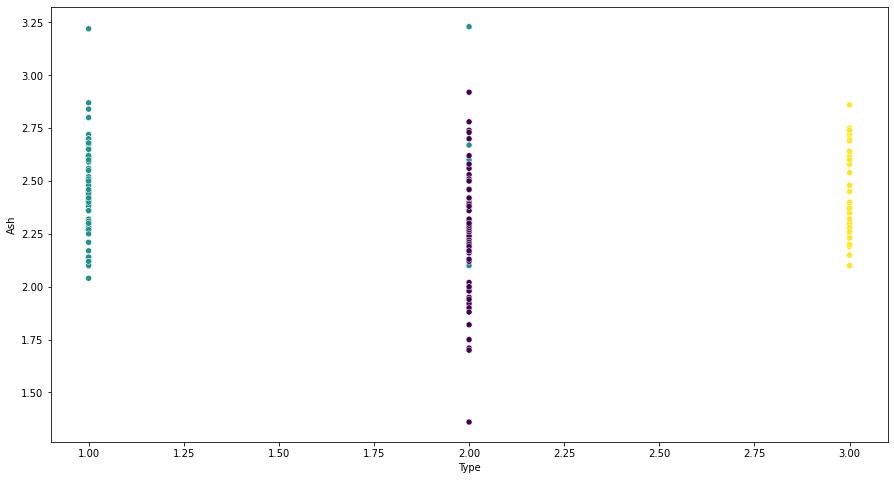

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(wine_data['Type'],wine_data['Ash'],c=kmeans_model.labels_) 
plt.show()

#### As we can see in above plot some of the points are misclassified compared to the original data.

## Hierarchical Clustering

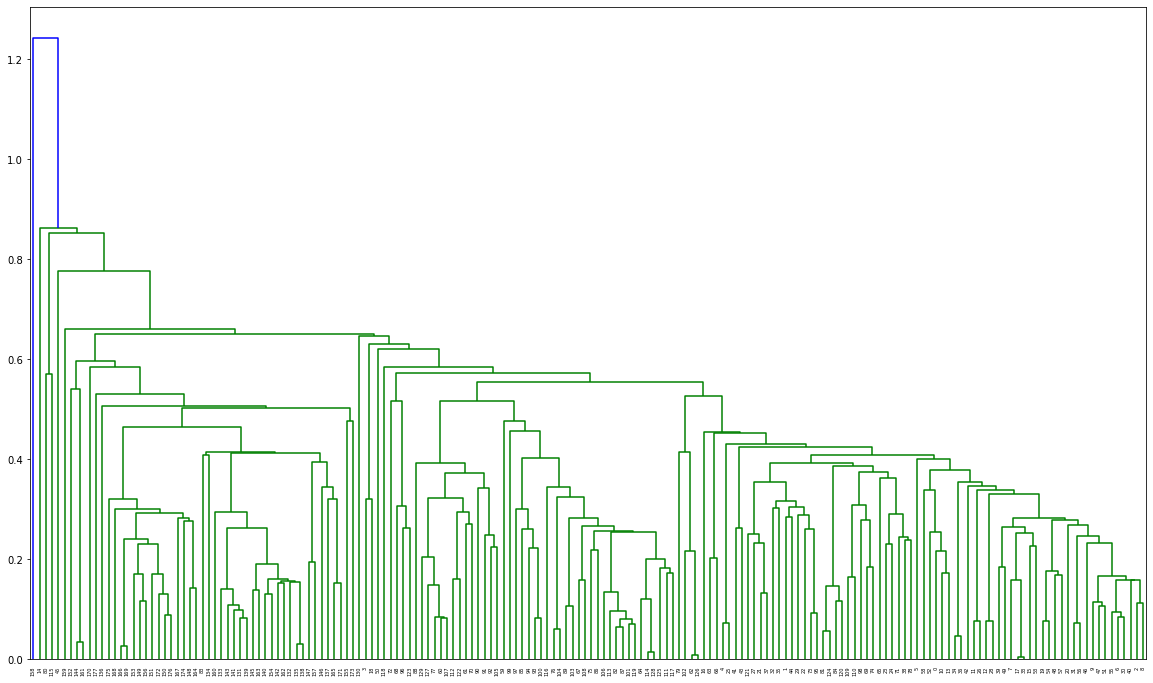

In [47]:
plt.figure(figsize=(20,12))
dend=sch.dendrogram(sch.linkage(wine_data_1_tranform,method='single'))

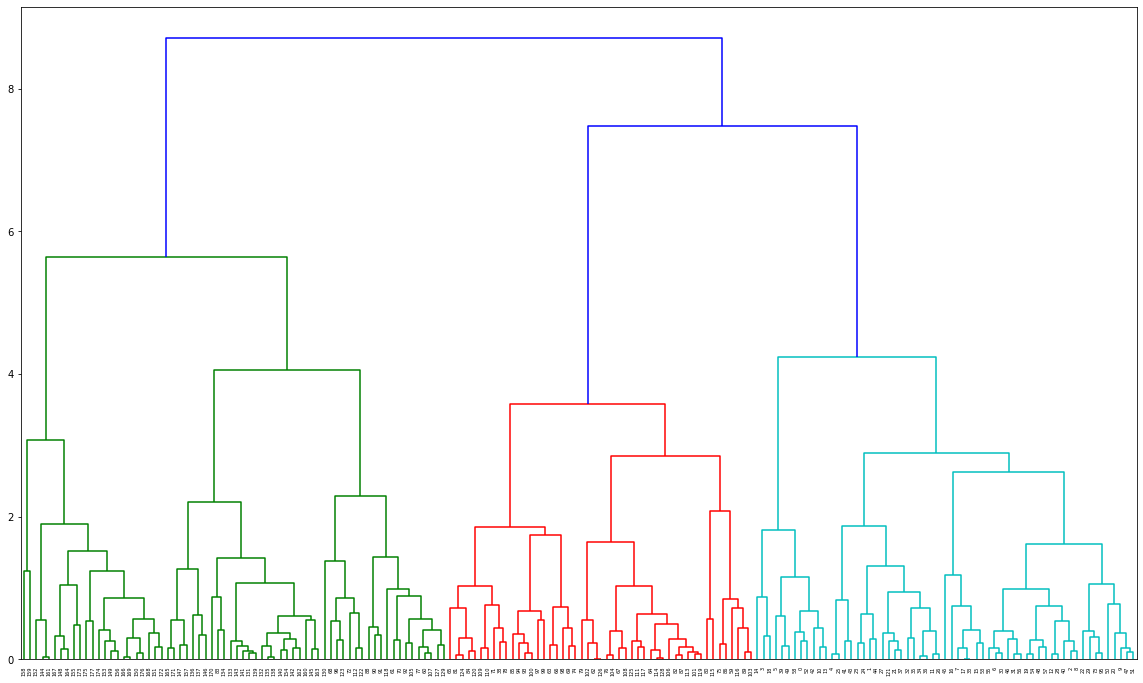

In [48]:
plt.figure(figsize=(20,12))
dend=sch.dendrogram(sch.linkage(wine_data_1_tranform,method='complete'))

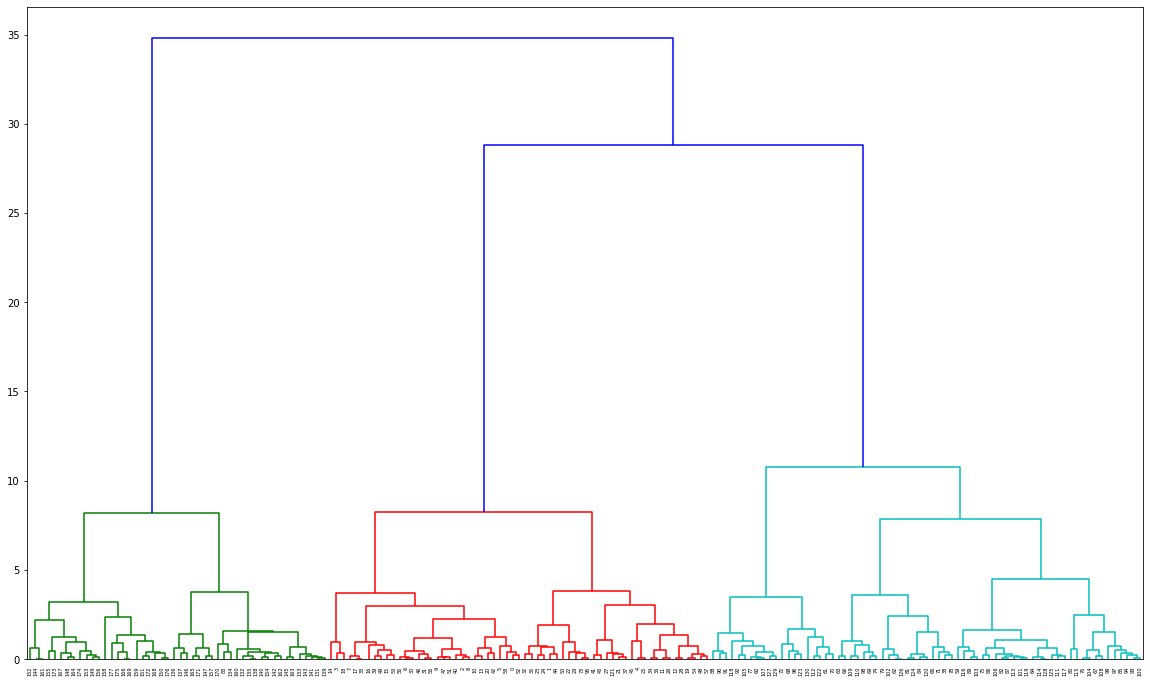

In [49]:
plt.figure(figsize=(20,12))
dend=sch.dendrogram(sch.linkage(wine_data_1_tranform,method='ward'))

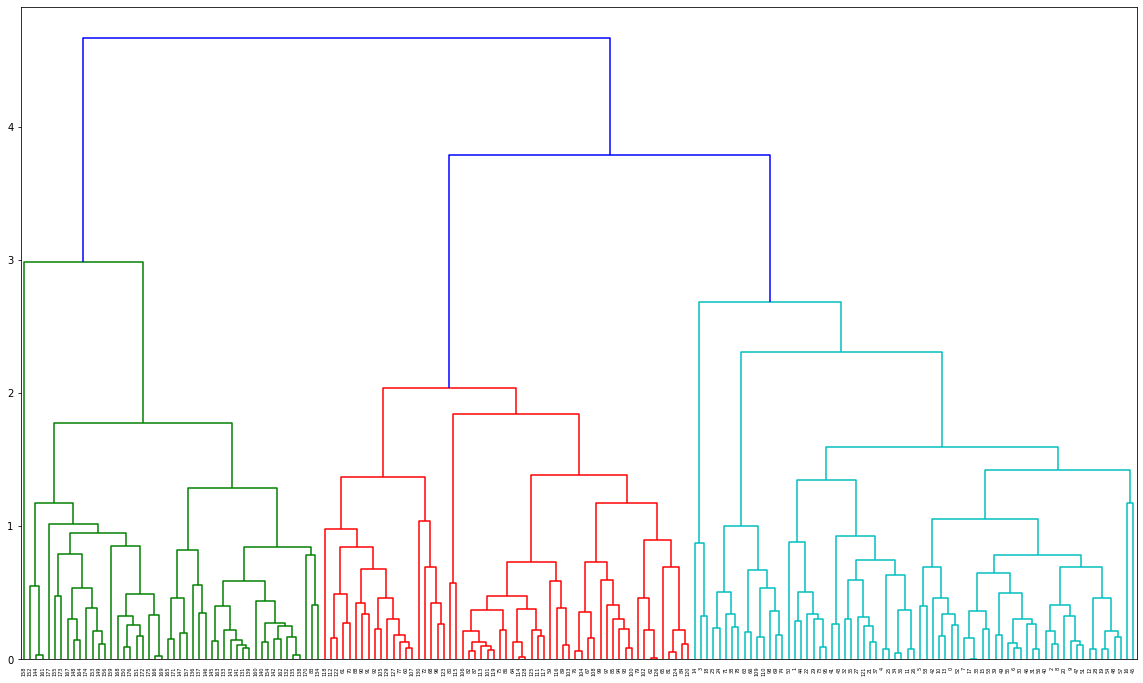

In [50]:
plt.figure(figsize=(20,12))
dend=sch.dendrogram(sch.linkage(wine_data_1_tranform,method='average'))

In [51]:
hier_model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
hier_model


AgglomerativeClustering(n_clusters=3)

In [52]:
y_hc = hier_model.fit_predict(wine_data_1_tranform)
y_hc = pd.DataFrame(y_hc,columns= ['clusters'])
y_hc

,clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [53]:
wine_data['clusters']= y_hc
wine_data.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2


In [54]:
wine_data['clusters'].value_counts()

0    69
2    61
1    48
Name: clusters, dtype: int64

In [55]:
wine_data[wine_data['Type']==1].shape

(59, 15)

In [56]:
wine_data[wine_data['Type']==2].shape

(71, 15)

In [57]:
wine_data[wine_data['Type']==3].shape

(48, 15)

In [58]:
wine_data[wine_data['clusters']==0].shape

(69, 15)

In [59]:
wine_data[wine_data['clusters']==1].shape

(48, 15)

In [60]:
wine_data[wine_data['clusters']==2].shape

(61, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


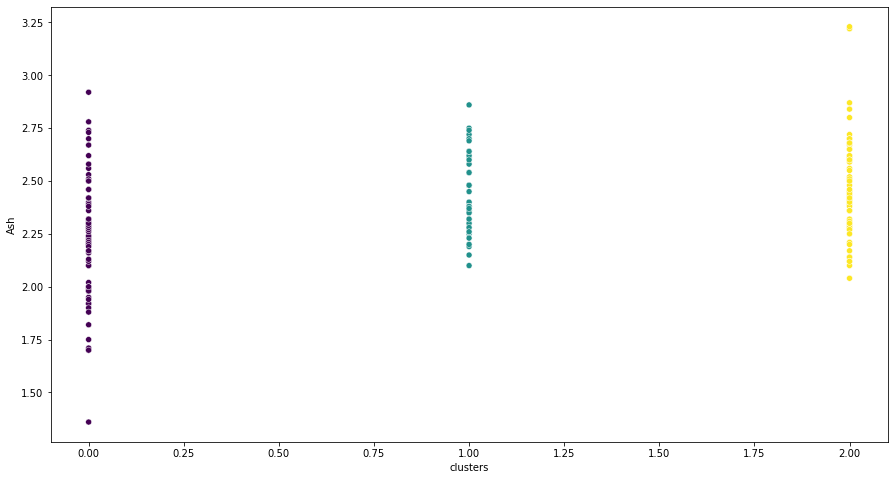

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(wine_data['clusters'],wine_data['Ash'],c=hier_model.labels_) 
plt.show()

### Plot for the Actual data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


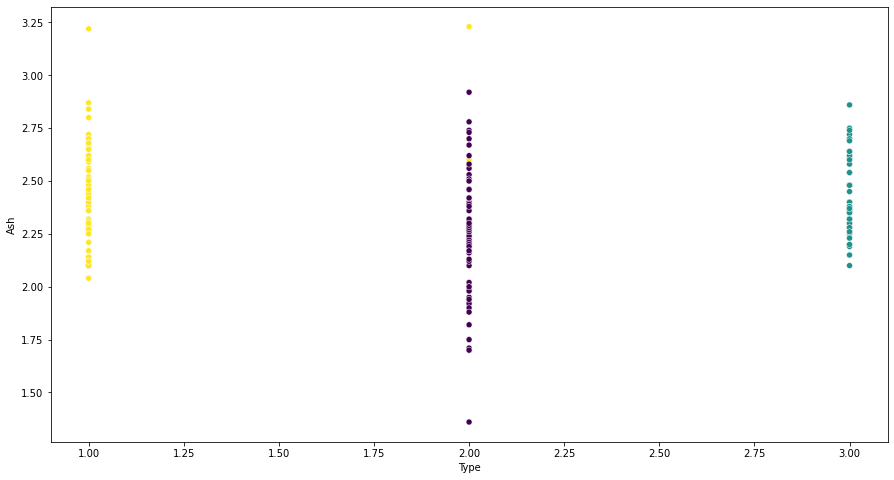

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(wine_data['Type'],wine_data['Ash'],c=hier_model.labels_) 
plt.show()